In [1]:
import pandas as pd

# !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [2]:
diabetes.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [3]:
features = list(diabetes.columns[1:-1])
label = 'Diabetic'

In [4]:
X, y = diabetes[features].values, diabetes[label].values

In [5]:
import numpy as np
import matplotlib.pyplot as plt

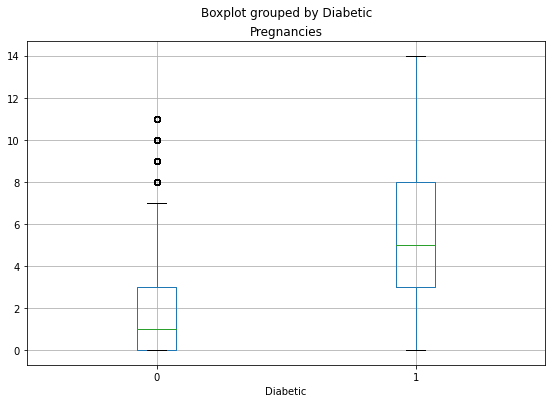

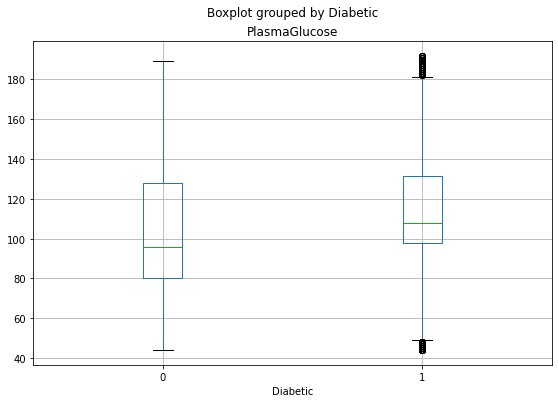

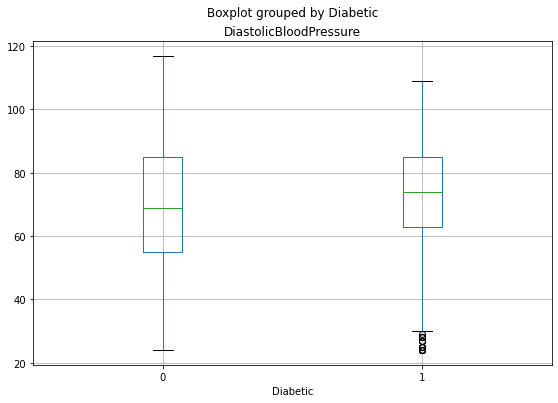

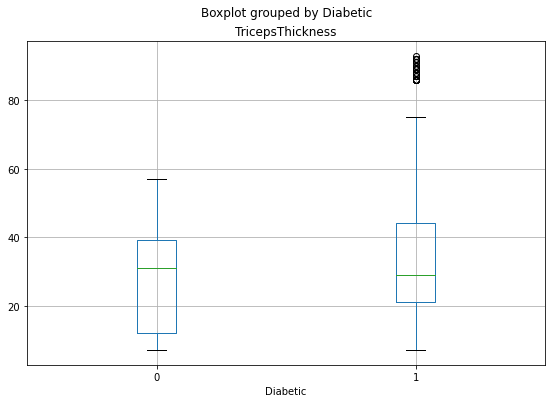

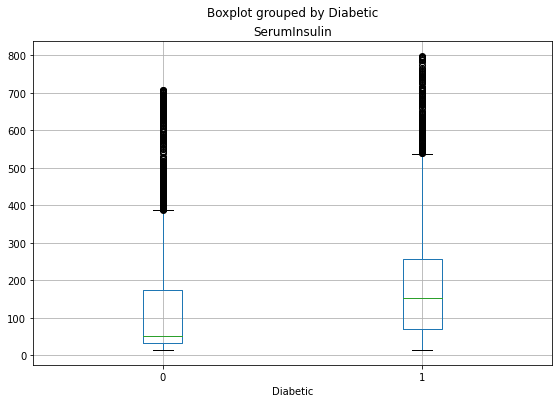

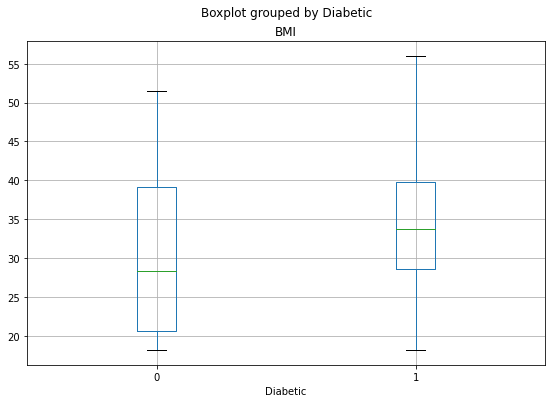

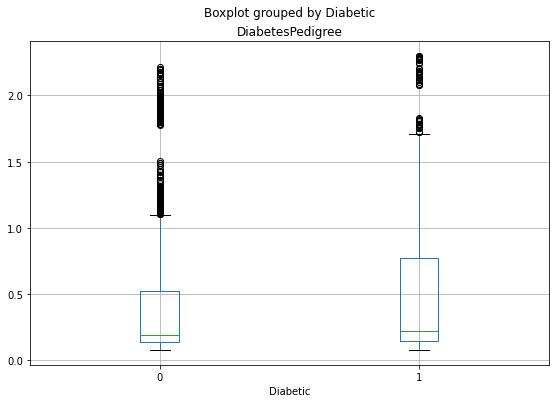

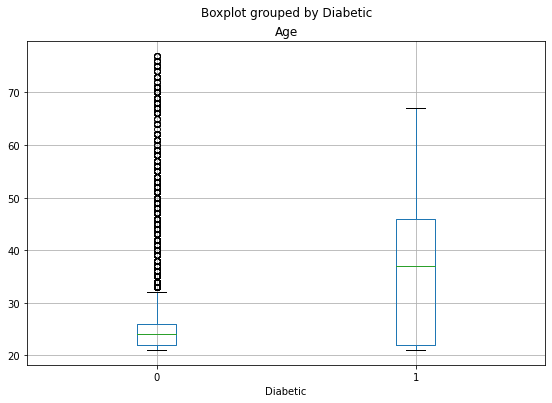

In [6]:
for col in features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    diabetes.boxplot(col, by=label, ax=ax)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
reg = 0.01

In [10]:
model = LogisticRegression(C=1/reg, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=100.0, solver='liblinear')

In [11]:
pred = model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(y_test, pred)

0.7891111111111111

In [14]:
from sklearn.metrics import classification_report

In [15]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



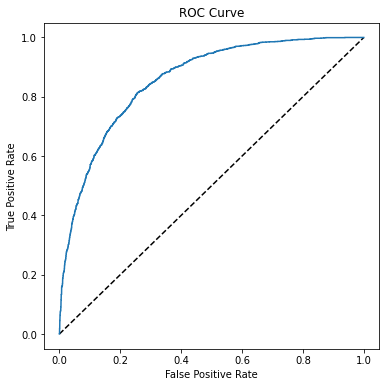

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt

y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])


fig = plt.figure(figsize=(6, 6))

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [18]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
auc

0.8568610804626786

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [22]:
from sklearn.pipeline import Pipeline

In [21]:
from sklearn.linear_model import LogisticRegression

In [23]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [24]:
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [25]:
from sklearn.compose import ColumnTransformer

In [34]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, list(range(7))), ('cat', categorical_transformer, [7])])

In [35]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('logregressor', LogisticRegression(C=1/reg, solver='liblinear'))])

In [37]:
model = pipeline.fit(X_train, y_train)

Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202440539337693


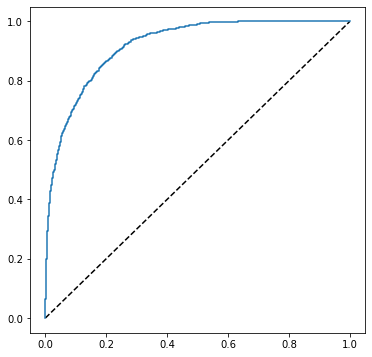

In [41]:
from sklearn import metrics
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)


cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', metrics.accuracy_score(y_test, predictions))
print("Overall Precision:",metrics.precision_score(y_test, predictions))
print("Overall Recall:",metrics.recall_score(y_test, predictions))
auc = metrics.roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)

plt.show()

In [42]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])


model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


Confusion Matrix:
 [[2849  137]
 [ 173 1341]] 

Accuracy: 0.9311111111111111
Overall Precision: 0.9073071718538566
Overall Recall: 0.8857331571994715
AUC: 0.9822764932963252


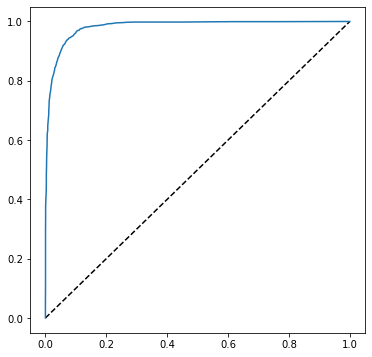

In [43]:
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)


cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', metrics.accuracy_score(y_test, predictions))
print("Overall Precision:",metrics.precision_score(y_test, predictions))
print("Overall Recall:",metrics.recall_score(y_test, predictions))
auc = metrics.roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)

plt.show()

In [44]:
import joblib
filename='./diabetes_model.pkl'
joblib.dump(model, filename)

['./diabetes_model.pkl']

In [45]:
model = joblib.load(filename)

In [46]:
model.predict(X_test) 

array([0, 0, 1, ..., 1, 1, 1])

In [47]:
y_scores

array([[0.99, 0.01],
       [1.  , 0.  ],
       [0.02, 0.98],
       ...,
       [0.01, 0.99],
       [0.04, 0.96],
       [0.41, 0.59]])

In [50]:
(y_scores[:,1]>y_scores[:,0]) == model.predict(X_test)

array([ True,  True,  True, ...,  True,  True,  True])